<a href="https://colab.research.google.com/github/danielbrioli/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [0]:
# Generate and numerically represent a confidence interval

coins = np.random.binomial(n=1, p=.5, size=50)
print(coins)

[0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1
 1 0 0 0 0 1 0 1 1 0 0 1 1]


In [0]:
def mean_moe(num_set, conf=0.95):
  num_set = np.array(num_set)
  mean = np.mean(num_set)
  num_len = len(num_set)
  stderr = np.std(num_set, ddof=1) / np.sqrt(num_len)
  t_stat = stats.t.ppf((1 + conf) / 2.0, num_len - 1)
  margin_of_error = t_stat * stderr
  return mean, margin_of_error

print(mean_moe(coins))

(0.48, 0.1434262093373269)


In [0]:
def confidence_interval(num_set, conf=0.95):
  sample = np.array(num_set)
  mean, moe = mean_moe(num_set, conf)
  return mean - moe, mean, mean + moe

print("  LB: " + str(confidence_interval(coins)[0]))
print("MEAN: " + str(confidence_interval(coins)[1]))
print("  UB: " + str(confidence_interval(coins)[2]))

  LB: 0.3365737906626731
MEAN: 0.48
  UB: 0.6234262093373268


In [0]:
# Graphically (with a plot) represent the confidence interval

coins_df = pd.DataFrame({'coins': coins})

print(coins_df.head())
print(coins_df.tail())

   coins
0      0
1      1
2      1
3      1
4      0
    coins
45      1
46      0
47      0
48      1
49      1


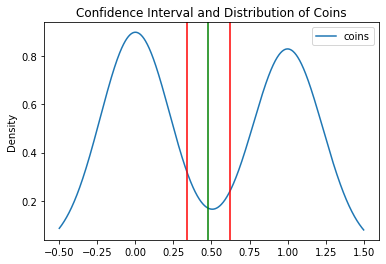

In [0]:
ci_data = confidence_interval(coins)

coins_df.plot.density()
plt.title("Confidence Interval and Distribution of Coins")
plt.axvline(x=ci_data[0], color='red')
plt.axvline(x=ci_data[1], color='green')
plt.axvline(x=ci_data[2], color='red');
plt.show()

In [0]:
# Interpret the confidence interval - what does it tell you about the data and
# its distribution?

# This confidence interval as plotted tells me that of the set of coin flips
# generated at the start of this notebook:
#
# The mean hovers around .5 (depends on the RNG)
#
# If the assumption about the population of all coin flips is that the mean is
# 0.5, then our coinfidence intervals overlap with that value and we would use
# this information to support a null hypothesis of all coin flips averaging out
# at 0.5. With a confidence of 95% we except 95% of confidence intervals to
# cover the population mean of 0.5 i.e. the null hypothesis.

In [0]:
# Take a dataset that we have used in the past in class that has categorical variables. Pick two of the categorical variables and run chi-sq tests on that data
# 1) by hand using numpy
# 2) in a single line using scipy

column_headers = ['name', 'landmass', 'zone', 'area', 'population', 'language', 
                  'religion', 'bars', 'stripes', 'colours', 'red', 'green', 
                  'blue', 'gold', 'white', 'black', 'orange', 'mainhue', 
                  'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 
                  'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft', 
                  'botright']

flags = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data", names=column_headers)

print("#=========================== flags.shape")
print(flags.shape)
print("#=========================== flags.head(10)")
print(flags.head(10))
print("#=========================== flags.tail(10)")
print(flags.tail(10))
print("#=========================== flags.isnull().sum().sort_values()")
print(flags.isnull().sum().sort_values())
print("#=========================== flags.describe()")
print(flags.describe())

#=========================== flags.shape
(194, 30)
#=========================== flags.head(10)
              name  landmass  zone  area  ...  animate  text  topleft  botright
0      Afghanistan         5     1   648  ...        0     0    black     green
1          Albania         3     1    29  ...        1     0      red       red
2          Algeria         4     1  2388  ...        0     0    green     white
3   American-Samoa         6     3     0  ...        1     0     blue       red
4          Andorra         3     1     0  ...        0     0     blue       red
5           Angola         4     2  1247  ...        0     0      red     black
6         Anguilla         1     4     0  ...        1     0    white      blue
7  Antigua-Barbuda         1     4     0  ...        0     0    black       red
8        Argentina         2     3  2777  ...        0     0     blue      blue
9        Argentine         2     3  2777  ...        0     0     blue      blue

[10 rows x 30 columns]
#

In [0]:
print(flags.describe(exclude='number'))
print(flags['religion'].describe()) # 7. religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others
# LOL WHAT IS MARXIST RELIGION, WE HAVE TO GO DEEPER.
mr_df = flags[flags['religion'] == 6]
print(mr_df['name'])
# Ahh, yes, the well-known marxist religion named "catholicism" of cuba.
# I believe there are errors in some of the classification in this database.
# Specifically w.r.t. cold-war era cultural propaganda.
# I will still use it, but... yikes. It's 15 out of 194. 7-8%ish? of the set.

            name mainhue topleft botright
count        194     194     194      194
unique       194       8       7        8
top     Portugal     red     red      red
freq           1      71      56       69
count    194.000000
mean       2.190722
std        2.061167
min        0.000000
25%        1.000000
50%        1.000000
75%        4.000000
max        7.000000
Name: religion, dtype: float64
1             Albania
26           Bulgaria
37              China
43               Cuba
45     Czechoslovakia
64        Germany-DDR
79            Hungary
96               Laos
115          Mongolia
128       North-Korea
138            Poland
142           Romania
184              USSR
188           Vietnam
190        Yugoslavia
Name: name, dtype: object


In [0]:
cut_points = [-1, 0, 1, 2, 3, 4, 5, 6, 7]
label_names = ['Catholic', 'Other Christian', 'Muslim', 'Buddhist', 'Hindu', 'Ethnic', 'Marxist', 'Others']
flags['religion_categories'] = pd.cut(flags['religion'], cut_points, labels=label_names)

print(flags.head())
print(flags.tail())

             name  landmass  zone  ...  topleft  botright  religion_categories
0     Afghanistan         5     1  ...    black     green               Muslim
1         Albania         3     1  ...      red       red              Marxist
2         Algeria         4     1  ...    green     white               Muslim
3  American-Samoa         6     3  ...     blue       red      Other Christian
4         Andorra         3     1  ...     blue       red             Catholic

[5 rows x 31 columns]
              name  landmass  zone  ...  topleft  botright  religion_categories
189  Western-Samoa         6     3  ...     blue       red      Other Christian
190     Yugoslavia         3     1  ...     blue       red              Marxist
191          Zaire         4     2  ...    green     green               Ethnic
192         Zambia         4     2  ...    green     brown               Ethnic
193       Zimbabwe         4     2  ...    green     green               Ethnic

[5 rows x 31 columns]


In [0]:
print(flags.isnull().sum().sort_values()) # had some issues generating NaNs, checking to make sure it's correct
print(flags['religion'].describe())

name                   0
topleft                0
text                   0
animate                0
icon                   0
triangle               0
crescent               0
sunstars               0
quarters               0
saltires               0
crosses                0
circles                0
mainhue                0
orange                 0
botright               0
black                  0
gold                   0
blue                   0
green                  0
red                    0
colours                0
stripes                0
bars                   0
religion               0
language               0
population             0
area                   0
zone                   0
landmass               0
white                  0
religion_categories    0
dtype: int64
count    194.000000
mean       2.190722
std        2.061167
min        0.000000
25%        1.000000
50%        1.000000
75%        4.000000
max        7.000000
Name: religion, dtype: float64


In [0]:
# this will be used for the scipy version below
contingency_table = pd.crosstab(flags['mainhue'], flags['religion_categories'], margins=True)

contingency_table

religion_categories,Catholic,Other Christian,Muslim,Buddhist,Hindu,Ethnic,Marxist,Others,All
mainhue,,,,,,,,,
black,1,1,2,0,0,1,0,0,5
blue,9,24,2,1,0,2,2,0,40
brown,0,0,1,0,1,0,0,0,2
gold,6,3,3,1,0,5,1,0,19
green,3,6,12,0,1,8,0,1,31
orange,0,1,1,1,1,0,0,0,4
red,15,16,15,4,1,10,10,0,71
white,6,9,0,1,0,1,2,3,22
All,40,60,36,8,4,27,15,4,194


In [0]:
# by hand using numpy

row_sums = contingency_table.iloc[0:8, 8].values
col_sums = contingency_table.iloc[8, 0:8].values

print(row_sums)
print(col_sums)

[ 5 40  2 19 31  4 71 22]
[40 60 36  8  4 27 15  4]


In [0]:
total = flags.shape[0]

In [0]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)  
print(expected)

(8, 8)
[[ 1.03092784  1.54639175  0.92783505  0.20618557  0.10309278  0.69587629
   0.38659794  0.10309278]
 [ 8.24742268 12.37113402  7.42268041  1.64948454  0.82474227  5.56701031
   3.09278351  0.82474227]
 [ 0.41237113  0.6185567   0.37113402  0.08247423  0.04123711  0.27835052
   0.15463918  0.04123711]
 [ 3.91752577  5.87628866  3.5257732   0.78350515  0.39175258  2.6443299
   1.46907216  0.39175258]
 [ 6.39175258  9.58762887  5.75257732  1.27835052  0.63917526  4.31443299
   2.39690722  0.63917526]
 [ 0.82474227  1.2371134   0.74226804  0.16494845  0.08247423  0.55670103
   0.30927835  0.08247423]
 [14.63917526 21.95876289 13.17525773  2.92783505  1.46391753  9.8814433
   5.48969072  1.46391753]
 [ 4.53608247  6.80412371  4.08247423  0.90721649  0.45360825  3.06185567
   1.70103093  0.45360825]]


In [0]:
observed = pd.crosstab(flags['mainhue'], flags['religion_categories']).values
print(observed.shape)
observed

(8, 8)


array([[ 1,  1,  2,  0,  0,  1,  0,  0],
       [ 9, 24,  2,  1,  0,  2,  2,  0],
       [ 0,  0,  1,  0,  1,  0,  0,  0],
       [ 6,  3,  3,  1,  0,  5,  1,  0],
       [ 3,  6, 12,  0,  1,  8,  0,  1],
       [ 0,  1,  1,  1,  1,  0,  0,  0],
       [15, 16, 15,  4,  1, 10, 10,  0],
       [ 6,  9,  0,  1,  0,  1,  2,  3]])

In [0]:
chi_squared = ((observed - expected)**2/(expected)).sum() 
print("x^2: " + str(chi_squared))

x^2: 115.08500594392557


In [0]:
# in a single line using scipy

# this also uses the contingency_table created above

print(stats.chi2_contingency(contingency_table))

(115.08500594392558, 9.416544389084367e-05, 64, array([[1.03092784e+00, 1.54639175e+00, 9.27835052e-01, 2.06185567e-01,
        1.03092784e-01, 6.95876289e-01, 3.86597938e-01, 1.03092784e-01,
        5.00000000e+00],
       [8.24742268e+00, 1.23711340e+01, 7.42268041e+00, 1.64948454e+00,
        8.24742268e-01, 5.56701031e+00, 3.09278351e+00, 8.24742268e-01,
        4.00000000e+01],
       [4.12371134e-01, 6.18556701e-01, 3.71134021e-01, 8.24742268e-02,
        4.12371134e-02, 2.78350515e-01, 1.54639175e-01, 4.12371134e-02,
        2.00000000e+00],
       [3.91752577e+00, 5.87628866e+00, 3.52577320e+00, 7.83505155e-01,
        3.91752577e-01, 2.64432990e+00, 1.46907216e+00, 3.91752577e-01,
        1.90000000e+01],
       [6.39175258e+00, 9.58762887e+00, 5.75257732e+00, 1.27835052e+00,
        6.39175258e-01, 4.31443299e+00, 2.39690722e+00, 6.39175258e-01,
        3.10000000e+01],
       [8.24742268e-01, 1.23711340e+00, 7.42268041e-01, 1.64948454e-01,
        8.24742268e-02, 5.56701031e

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)